In [1]:
from matplotlib import pyplot as plt
import platform, os, sys, h5py
import numpy as np
from tabulate import tabulate
from pprint import pprint
from tqdm import tqdm

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\Gerwin\Documents\Code')
    from BEMHelper import interpolate_slow
else:
    sys.path.append('/mnt/s/_Data/160603 - EonHe M016v5/modules')
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    %config InlineBackend.figure_format='retina'

from Common import common, kfit
from TrapAnalysis import trap_analysis, import_data, artificial_anneal as anneal
from HeliumSurface.static_surface import *
from ipywidgets import interact

%matplotlib inline

In [11]:
def instantaneous_freq(fstart, fstop, Npts):
#     return np.logspace(np.log10(fstart), np.log10(fstop), Npts)
    return np.linspace(fstart, fstop, Npts)

def chirp(t, fstart, fstop):
    f = instantaneous_freq(fstart, fstop, len(t))
    return 1.0 * np.sin(2*np.pi*f*t)

# Linear chirp spectrum

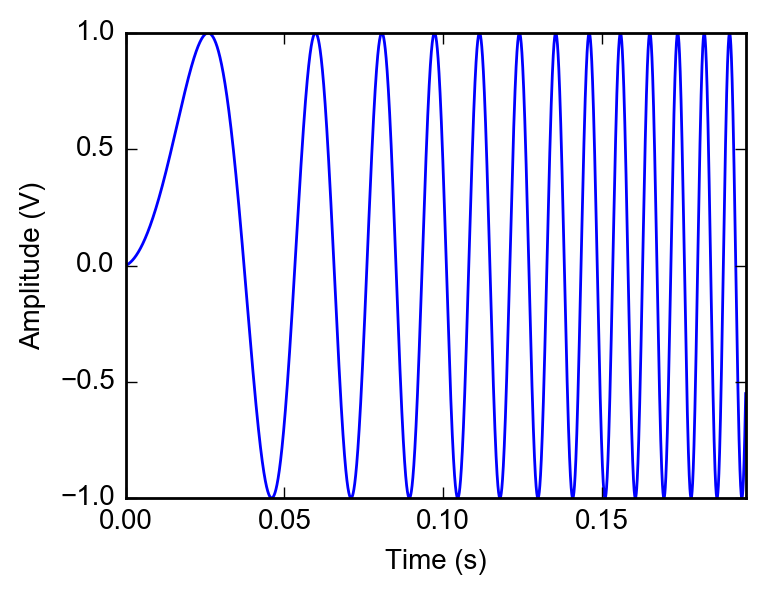

In [13]:
fs = 51.2E3
plotN = 10000

fstart = 1.0
fstop = 10000.0

t = np.arange(0.0, 30.0, 1/fs)
A = chirp(t, fstart, fstop)

fig = plt.figure(figsize=(4.,3))
common.configure_axes(10)

plt.plot(t[:plotN], A[:plotN])
plt.xlim(0, t[plotN])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")

Maximum contribution to signal is 7.56e-04 for a frequency of 0.00e+00 Hz


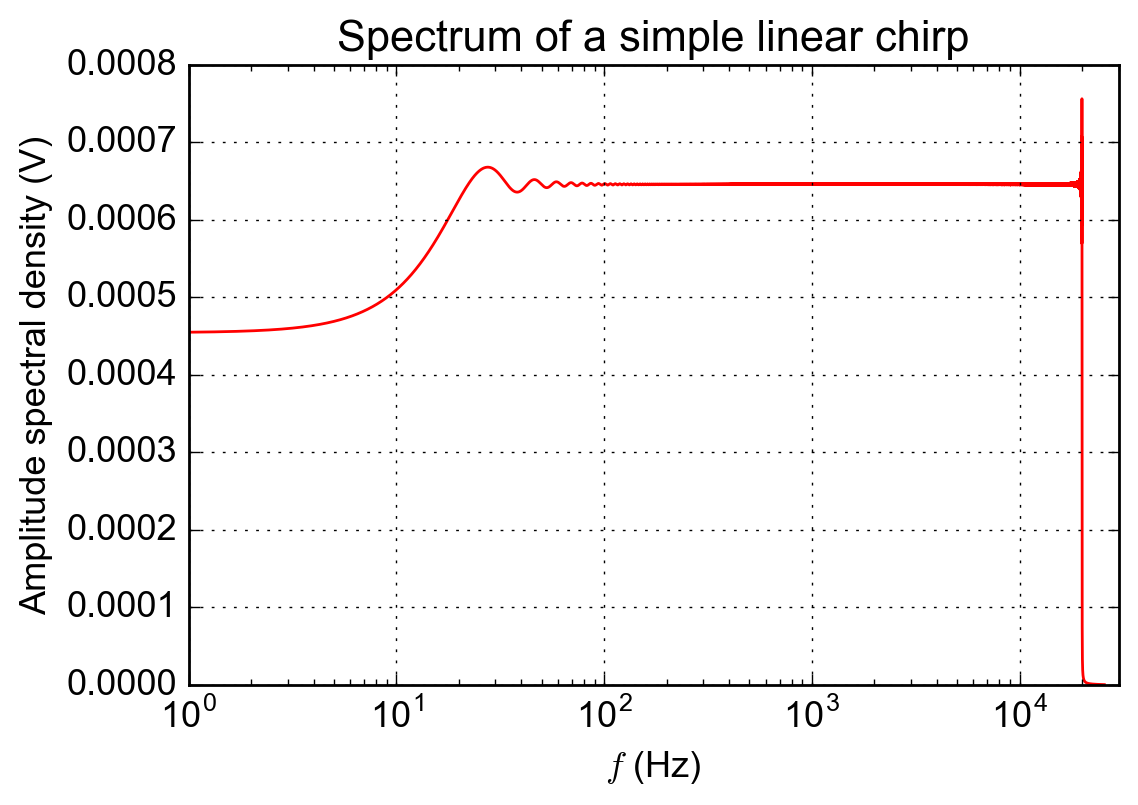

In [29]:
common.plot_spectrum(A, t)
plt.xscale('log')
plt.yscale('linear')
plt.grid('on')
plt.xlim(1, 3E4)
# plt.ylim(1E-8, 4E-4)
plt.title("Spectrum of a simple linear chirp")

# With a finite rise time

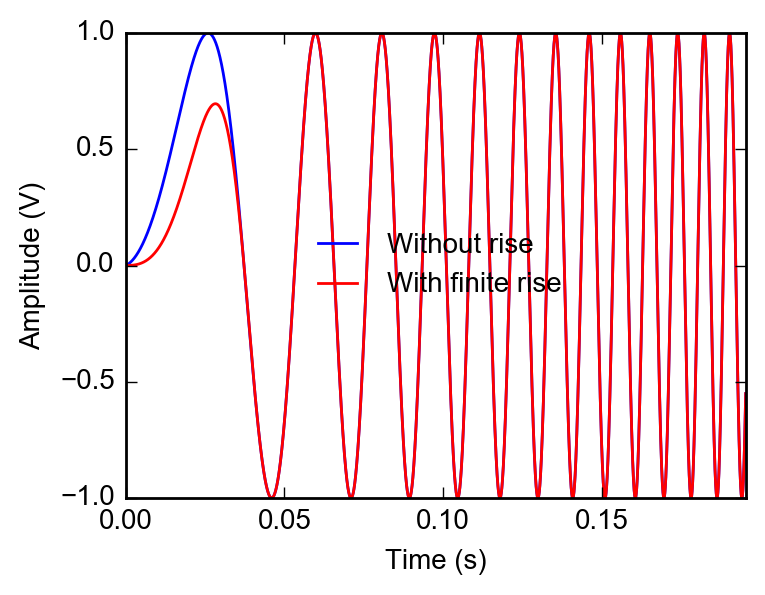

In [24]:
Nrise = 2000
Nfall = 7500

B = A.copy()
B[:Nrise] = A[:Nrise] * np.linspace(0, 1, Nrise)
B[-Nfall:] = A[-Nfall:] * np.linspace(1, 0, Nfall)

fig = plt.figure(figsize=(4.,3))
common.configure_axes(10)

plt.plot(t[:plotN], A[:plotN], 'b', label='Without rise')
plt.plot(t[:plotN], B[:plotN], 'r', label='With finite rise')
plt.xlim(0, t[plotN])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")

plt.legend(loc=0, frameon=False, prop={"size":10})

Maximum contribution to signal is 6.69e-04 for a frequency of 0.00e+00 Hz


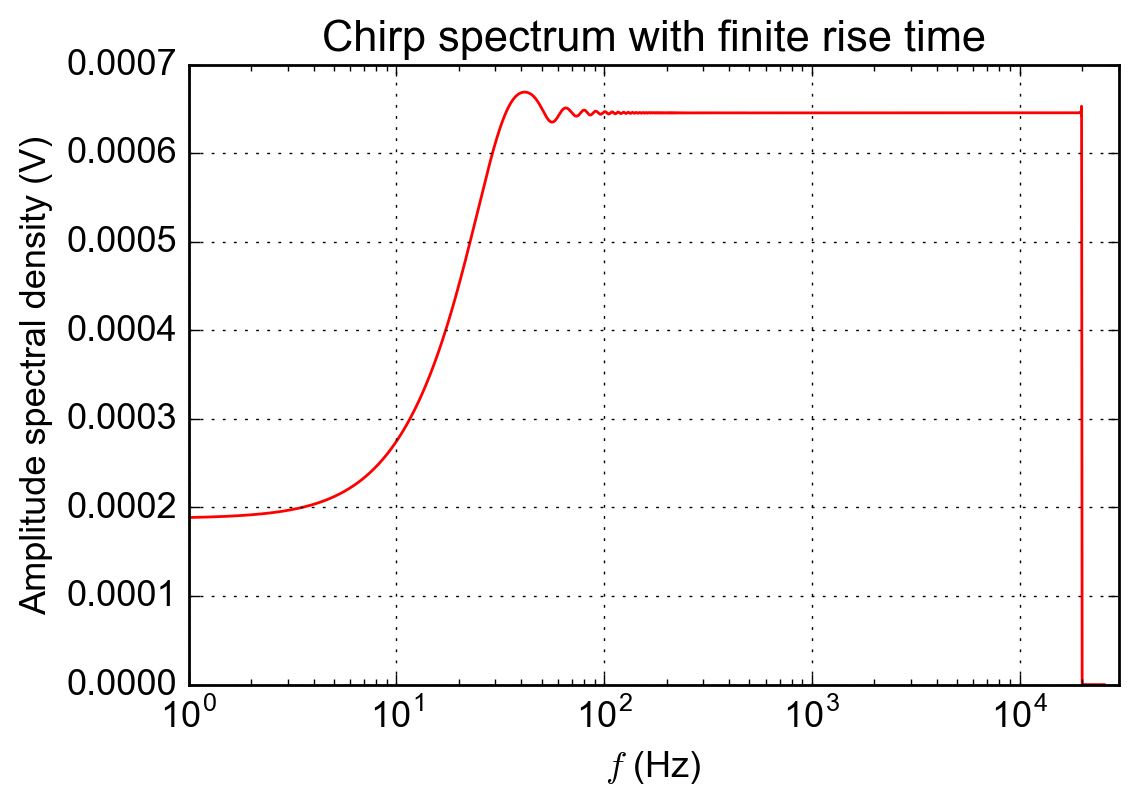

In [28]:
common.plot_spectrum(B, t)
plt.xscale('log')
plt.yscale('linear')
plt.grid('on')
plt.xlim(1, 3E4)
# plt.ylim(0, 4E-4)
plt.title("Chirp spectrum with finite rise time")